In [1]:
import pandas as pd

import torch
from transformers import AutoModelForSequenceClassification, BertTokenizerFast, Trainer, TrainingArguments

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('/kaggle/input/wb_winter_24/train.csv', index_col='ID')
df.head()

,text,label
ID,,
0,"Брюки отличные, качественные, но к сожалению к...",0
1,"Отличный аппарат, в комплекте кабель и работет...",0
2,Супер 👍 спасибо большое,0
3,Получил быстро данные наушники! К наушникам пр...,0
4,Всё дошло в целости и сохранности),0


In [3]:
df['label'].value_counts() / len(df) * 100

label
0    87.634026
1    12.365974
Name: count, dtype: float64

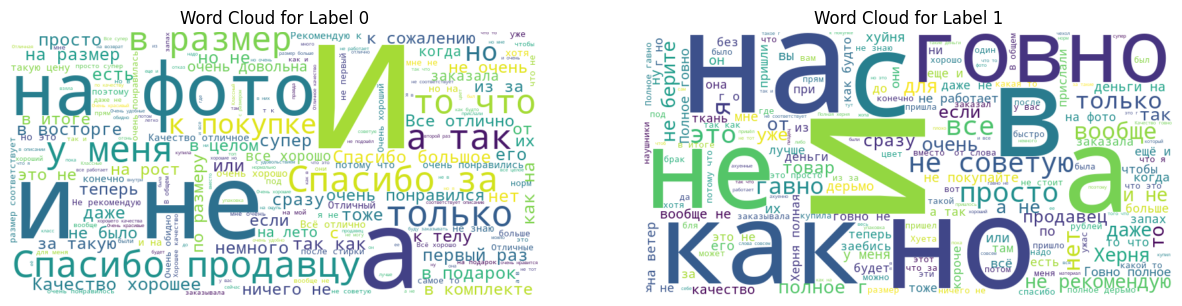

In [4]:
text_label_0 = ' '.join(df[df['label'] == 0]['text'])
text_label_1 = ' '.join(df[df['label'] == 1]['text'])

# Generate word clouds
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_label_0)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_label_1)

# Plotting the word clouds
plt.figure(figsize=(15, 7))

# Word cloud for label 0
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title('Word Cloud for Label 0')
plt.axis('off')

# Word cloud for label 1
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for Label 1')
plt.axis('off')

plt.show()

Top Bigrams for Label 0


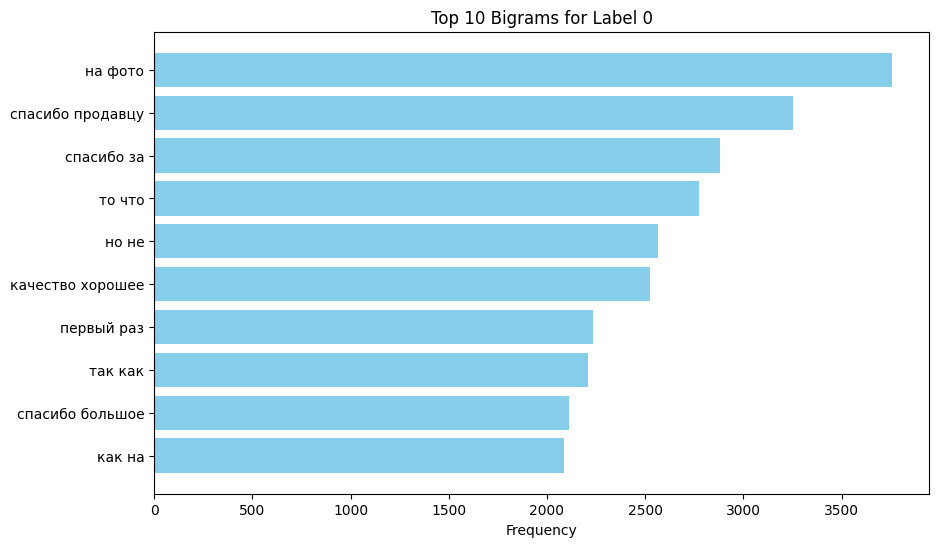

Top Trigrams for Label 0


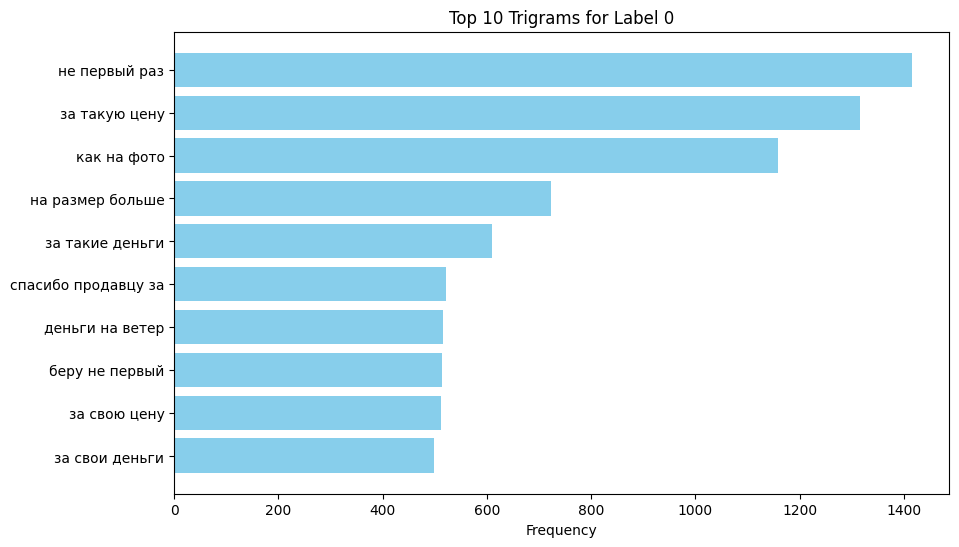

Top Bigrams for Label 1


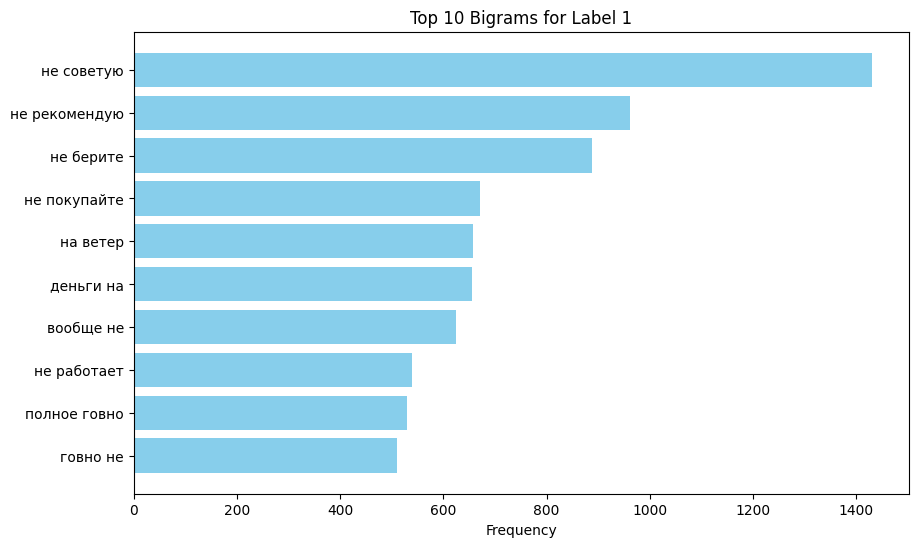

Top Trigrams for Label 1


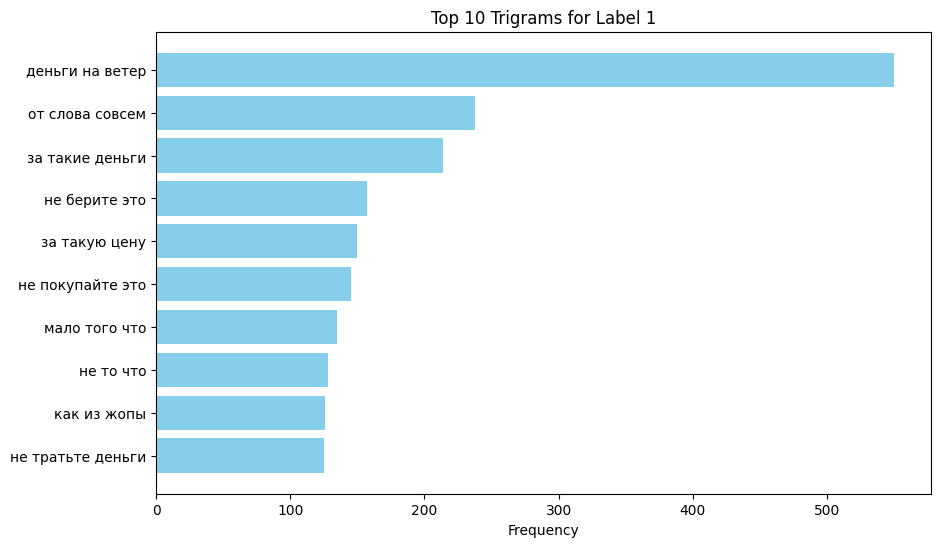

In [5]:
# Define a function to plot n-grams
def plot_top_ngrams(corpus, ngram_range=(2, 2), top_n=10, label=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    
    # Plotting
    words, freqs = zip(*words_freq)
    plt.figure(figsize=(10, 6))
    plt.barh(words, freqs, color='skyblue')
    plt.xlabel("Frequency")
    plt.title(f"Top {top_n} {'Bigrams' if ngram_range[1] == 2 else 'Trigrams'} for Label {label}")
    plt.gca().invert_yaxis()
    plt.show()

# Filter texts by label and generate bigrams and trigrams for each
for label in df['label'].unique():
    label_text = df[df['label'] == label]['text']
    print(f"Top Bigrams for Label {label}")
    plot_top_ngrams(label_text, ngram_range=(2, 2), top_n=10, label=label)
    
    print(f"Top Trigrams for Label {label}")
    plot_top_ngrams(label_text, ngram_range=(3, 3), top_n=10, label=label)

Top Bigrams


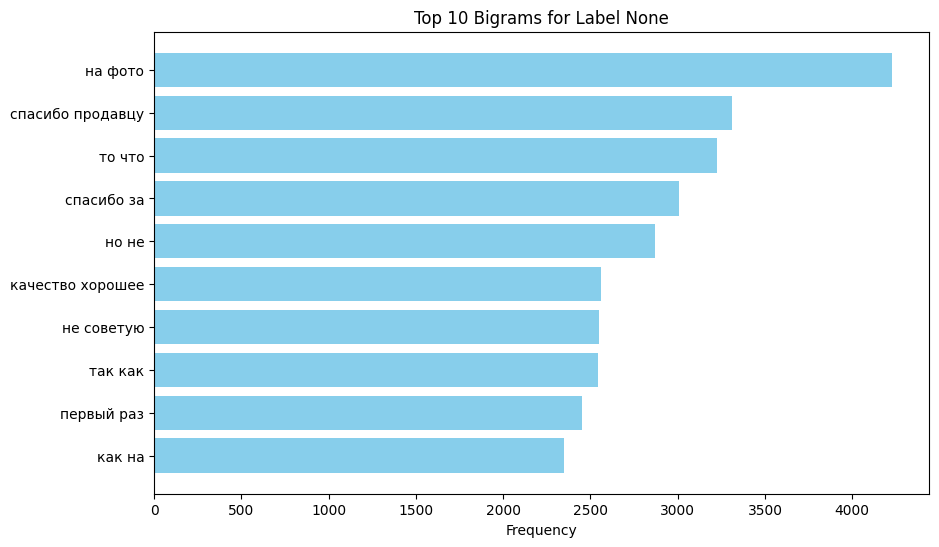

Top Trigrams


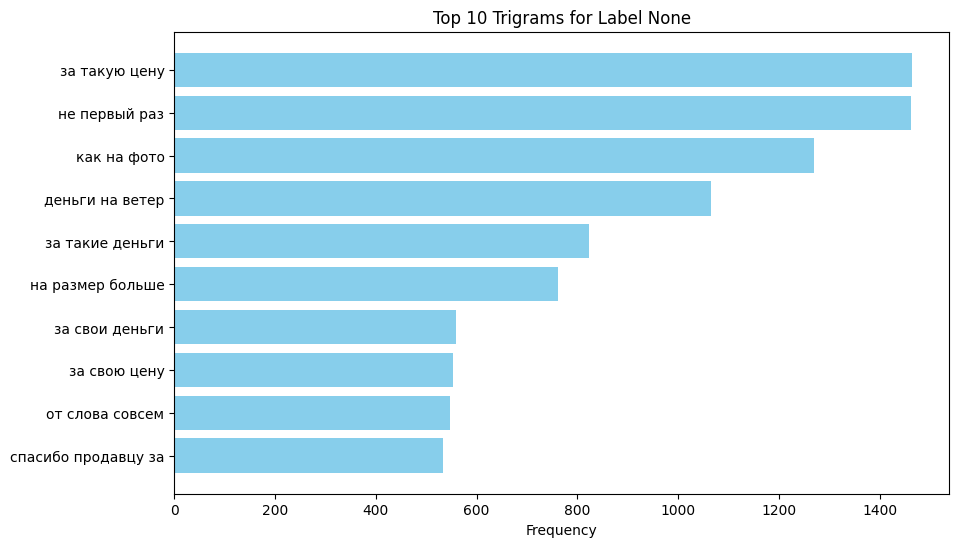

In [6]:
print(f"Top Bigrams")
plot_top_ngrams(df['text'], ngram_range=(2, 2), top_n=10)

print(f"Top Trigrams")
plot_top_ngrams(df['text'], ngram_range=(3, 3), top_n=10)

In [7]:
def calculate_vocabulary_size(label):
    # Filter text for the specific label
    label_text = df[df['label'] == label]['text']
    # Initialize CountVectorizer to create a vocabulary of unique words
    vectorizer = CountVectorizer(stop_words='english').fit(label_text)
    vocab_size = len(vectorizer.vocabulary_)
    return vocab_size

# Calculate and print vocabulary size for each label
for label in df['label'].unique():
    vocab_size = calculate_vocabulary_size(label)
    print(f"Vocabulary size for label {label}: {vocab_size}")

Vocabulary size for label 0: 131749
Vocabulary size for label 1: 55126


In [8]:
df['text'].apply(lambda x: len(x)).describe()

count    240159.000000
mean         94.741692
std         123.722501
min           1.000000
25%          27.000000
50%          57.000000
75%         115.000000
max        4995.000000
Name: text, dtype: float64

In [9]:
df['text'].unique().apply(lambda x: len(x)).describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [ ]:
df_test = pd.read_csv('/kaggle/input/wb_winter_24/test.csv', index_col='ID')
df_test

In [ ]:
df_test['text'].apply(lambda x: len(x)).describe()